In [16]:
# importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# importation des donnees
data = pd.read_csv("data/Fraud_light.csv")
data.head()

,index,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
3,5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0
4,6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0


In [18]:
data.columns

Index(['index', 'step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
data[data.isFraud == 1]

,index,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
8213,2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
8214,3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
8215,251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1
8216,252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1
8217,680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
16421,6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
16422,6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
16423,6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
16424,6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


# Dictionnaire de donnees
| Nom de la colonne   | Type        | Description                                                                 |
|---------------------|-------------|-----------------------------------------------------------------------------|
| `step`              | Integer     | Étape temporelle simulée (par exemple, nombre d'heures écoulées).          |
| `type`              | Catégoriel  | Type de transaction (ex. : PAYMENT, TRANSFER, CASH_OUT, etc.).             |
| `amount`            | Float       | Montant de la transaction.                                                 |
| `oldbalanceOrg`     | Float       | Solde du compte d’origine avant la transaction.                            |
| `newbalanceOrig`    | Float       | Solde du compte d’origine après la transaction.                            |
| `oldbalanceDest`    | Float       | Solde du compte de destination avant la transaction.                       |
| `newbalanceDest`    | Float       | Solde du compte de destination après la transaction.                       |
| `isFraud`           | Binaire     | Indicateur de fraude (0 = non frauduleux, 1 = frauduleux).                 |

## Preprocessing

In [20]:
# retrait des lignes dupliquees
data[data.duplicated()]

,index,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud


In [21]:
# control de la taille du jeu de donnees
data.shape

(16426, 9)

In [22]:
# resume sommaire des donnees
data.describe()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.642600e+04,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000
mean,2.124559e+06,186.002618,7.825494e+05,1.294806e+06,5.795780e+05,7.505569e+05,1.200173e+06,0.500000
std,2.612225e+06,238.094966,1.839331e+06,2.972844e+06,2.148391e+06,3.049864e+06,3.518234e+06,0.500015
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.106250e+03,3.000000,1.054568e+04,1.691425e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.212500e+03,7.000000,1.195569e+05,1.427532e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.500000
75%,5.188057e+06,367.000000,5.069235e+05,1.036454e+06,1.623433e+04,2.175222e+05,7.055517e+05,1.000000
max,6.362619e+06,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           16426 non-null  int64  
 1   step            16426 non-null  int64  
 2   type            16426 non-null  object 
 3   amount          16426 non-null  float64
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   oldbalanceDest  16426 non-null  float64
 7   newbalanceDest  16426 non-null  float64
 8   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.1+ MB


***Presence d'une colonne categorielle : type***

In [24]:
# Control de la colonne index
dict(data.index.value_counts())

{16425: 1,
 0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 16386: 1,
 16387: 1,
 16388: 1,
 16389: 1,
 16390: 1,
 16391: 1,
 16392: 1,
 16393: 1,
 16378: 1,
 16379: 1,
 16380: 1,
 16381: 1,
 16382: 1,
 16383: 1,
 16384: 1,
 16385: 1,
 16370: 1,
 16371: 1,
 16372: 1,
 16373: 1,
 16374: 1,
 16375: 1,
 16376: 1,
 16377: 1,
 16362: 1,
 16363: 1,
 16364: 1,
 16365: 1,
 16366: 1,
 16367: 1,
 16368: 1,
 16369: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 130: 1,
 131: 1,
 132: 1,
 133: 1,
 134: 1,
 135: 1,
 1

In [25]:
# retrait de la colonne index
data = data.drop(columns="index")

## gestion de la colonne categorielle : **type**

In [26]:
# control de la colonne type
dict(data.type.value_counts())

{'CASH_OUT': 5108,
 'TRANSFER': 4808,
 'PAYMENT': 4530,
 'CASH_IN': 1660,
 'DEBIT': 320}

### Methodes enviseageable
***Ces Methodes seront individuellement tester dans les cadres qui leur sont adequata afin d'obtenir le meilleur modele possible***
* Label encoder : les donnees sont ordinals 
* Frequency encoding : Technique d'encodage par defaut 

## Gestions des outlayers


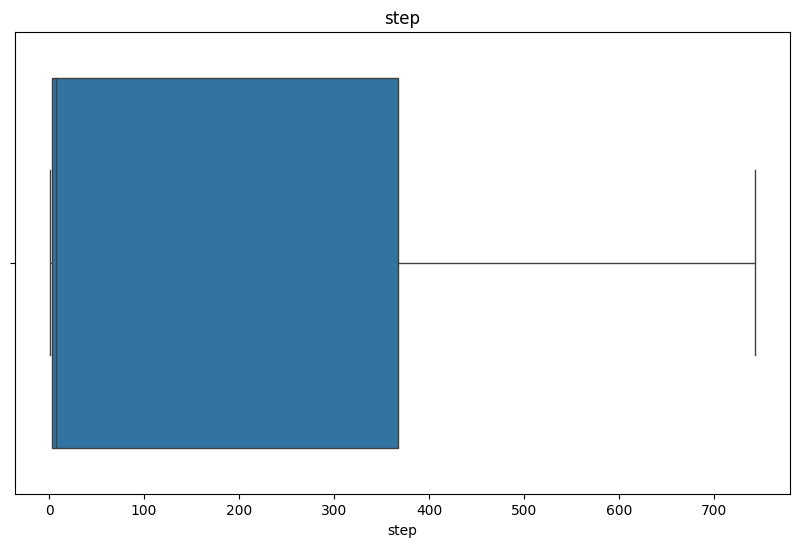

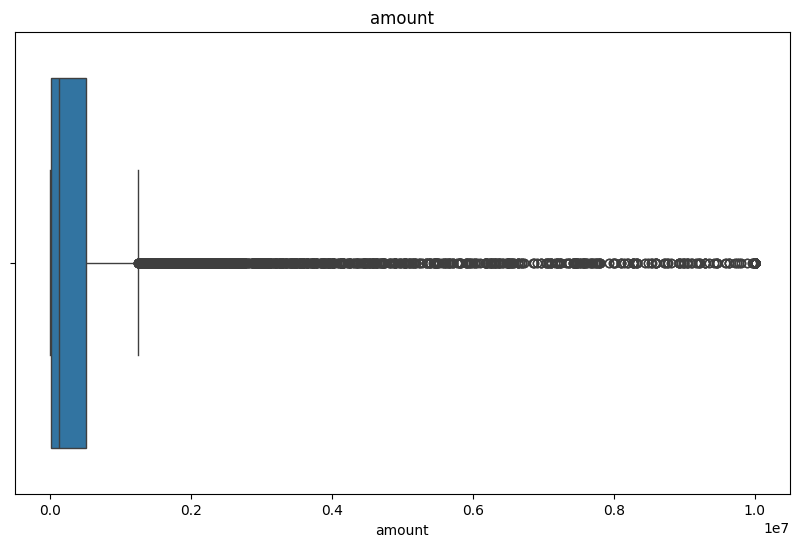

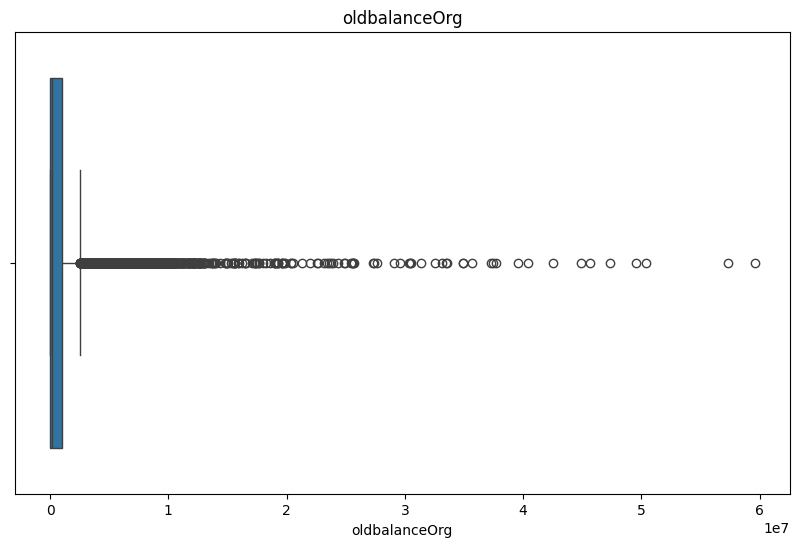

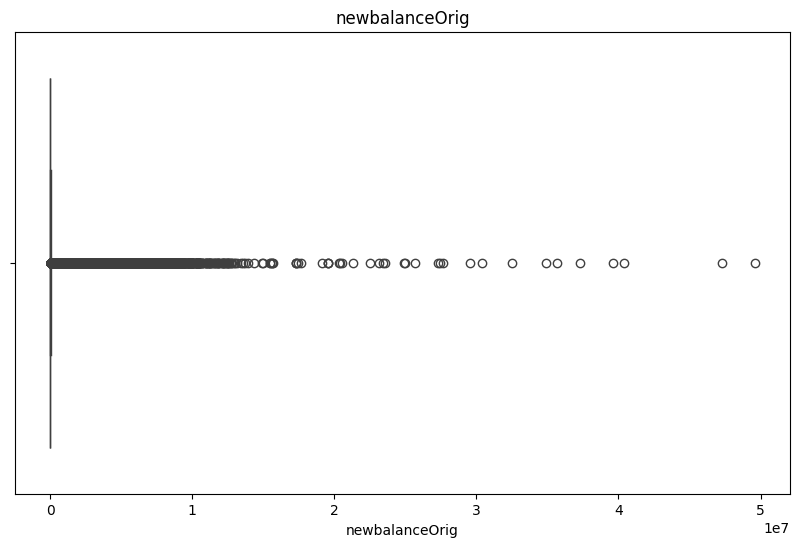

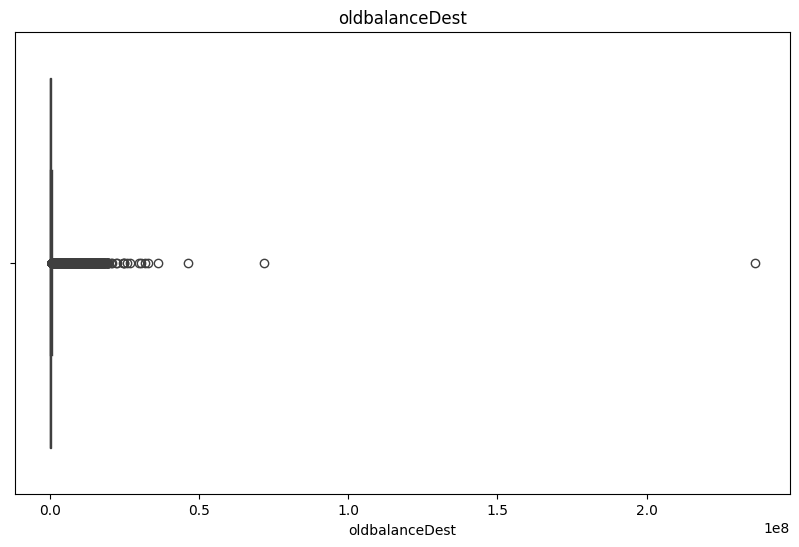

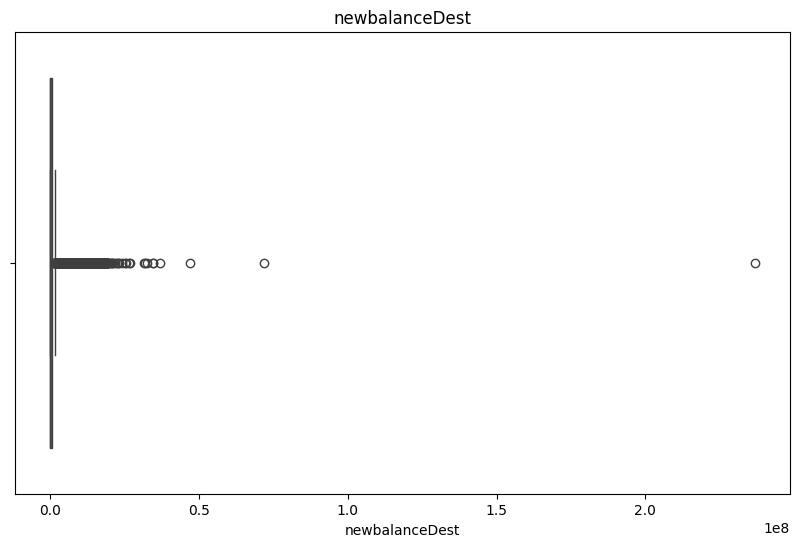

In [27]:
# Visualisation des outlayers
_ = list(data.columns)
_.remove("type") # colonne categorielle
_.remove("isFraud") # target

for i in _ :
    plt.figure(figsize=(10,6))
    sns.boxplot(data=data, x=i)
    plt.title(i)
    plt.show()

### Hypothese de resolutions
Dans le cadre de notre analyse les donnees aberant s'advere primordiale dans la detection de fraude , dans cette optique un retrait ou une grosse compression (les rammenees au marge ) s'advere absurde alors plusieur methodes seront tester :
* RobustScaler : methodes de scaling resistante au outlayers
* Transformation de donnees :
    * Log Transformation : methode par defaut (presence d'une longue queu a droite)
    * Box-cox transformation : Donnees strictement positive
    * Quantile transformation : Gere tres bien les valeurs extremes
* Gestion manuelle :
    * Detection avancees (Modele de detection d'anomalie , clustering)
    * Imputation / Suppression (Si necessaire)

***Nous testerons chaque methodes***

### Standardisation des donnees
1 seule methode est enviseageable du a la forte presence des outlayers :
* RobustScaler

### Gestion des correlations

<Axes: >

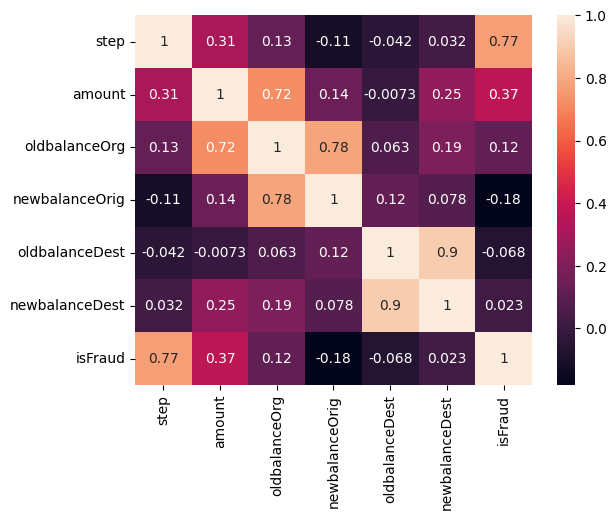

In [28]:
sns.heatmap(data=data.drop(columns=["type"]).corr(), annot=True)

***On observe plusieurs correlations fortes : necessite d'utilisee le PCA***

In [29]:
# Sauvegarde du jeu de donnees
data.to_csv("data/data.csv", index=False)

# Conception du modele

In [30]:
# Fontion d'encodage
from sklearn.preprocessing import LabelEncoder

def LabelEncoder_(data):
    le = LabelEncoder()
    data['type'] = le.fit_transform(data['type'])
    return data

def FrequencyEncoder(data):
    data['type'] = data['type'].map(data['type'].value_counts())
    return data

In [31]:
# Fonction de standardisation / Transformation
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

def RobustScaler_(X_train, X_test):
    Rs = RobustScaler()
    X_train_scaled = Rs.fit_transform(X_train)
    X_test_scaled = Rs.transform(X_test)
    return X_train_scaled, X_test_scaled

# Quantile tranformation
def QuantileTransformer_(X):
    Qt = QuantileTransformer()
    X_scaled = Qt.fit_transform(X)
    return X_scaled

# Box cox transformation
def PowerTransformer_(X):
    Pt = PowerTransformer(method='box-cox')
    X_scaled = Pt.fit_transform(X)
    return X_scaled

# Log transformation
def LogTransformation(data):
    # Liste des colonnes à log-transformer
    skewed_cols = data.select_dtypes(include=[np.number]).columns
    skewed_cols = [col for col in skewed_cols if data[col].skew() > 0.5 and (data[col] > 0).all()]

    # Appliquer log1p
    for col in skewed_cols:
        data[col] = np.log1p(data[col])

    return data

In [32]:
# Separation X , y
def Target_feature(data):
    X = data.drop(columns="isFraud")
    y = data[["isFraud"]]
    return X,y

In [33]:
from sklearn.preprocessing import PowerTransformer

def BoxCoxTransformation(X):
	# Liste des colonnes numériques skewées et strictement positives
    skewed_cols = X.select_dtypes(include=[np.number]).columns
    skewed_cols = [col for col in skewed_cols if X[col].skew() > 0.5 and (X[col] > 0).all()]
    
    # Appliquer la transformation Box-Cox
    for col in skewed_cols:
        reshaped = X[col].values.reshape(-1, 1)  # (n_samples,) → (n_samples, 1)
        transformed = PowerTransformer(method='box-cox').fit_transform(reshaped)
        X[col] = transformed.flatten()  # (n_samples, 1) → (n_samples,)
        
    return X

## SVM

### Determination du type de SVM a implementers

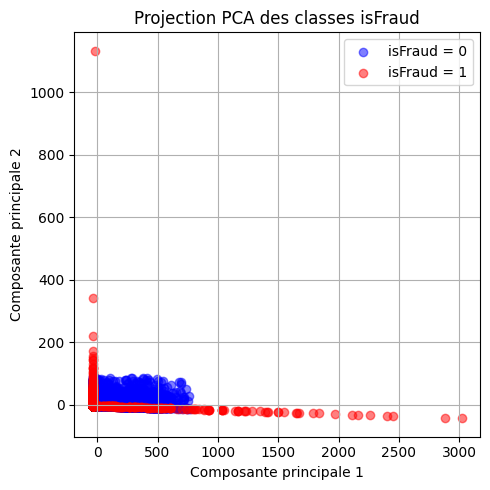

In [34]:
# Determination de la separabilite des donnees
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import KernelPCA

def pca_2d_visualisation(data):

    X = data.drop(columns="isFraud")
    X = FrequencyEncoder(X)
    y = data[["isFraud"]]

    # Normaliser les données
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Appliquer la PCA pour réduire à 2 dimensions
    pca = KernelPCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Création d'un DataFrame pour la visualisation
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['isFraud'] = y.values

    # Visualisation
    plt.figure(figsize=(5, 5))
    colors = {0: 'blue', 1: 'red'}
    for label in [0, 1]:
        subset = pca_df[pca_df['isFraud'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], c=colors[label], label=f'isFraud = {label}', alpha=0.5)

    plt.title('Projection PCA des classes isFraud')
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

pca_2d_visualisation(data)

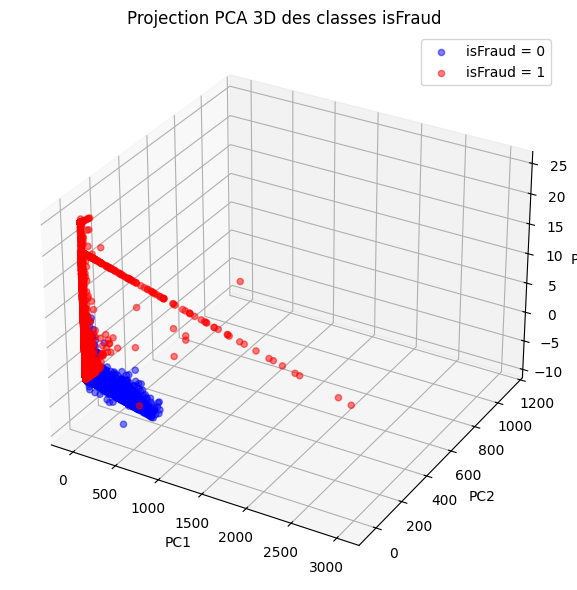

In [35]:
# Visualisation en 3 dimensions
def pca_3d_visualisation(data):
    # Supposons que vos données sont déjà chargées dans 'data'
    X = data.drop(columns="isFraud")
    y = data[["isFraud"]]

    # Garder uniquement les colonnes numériques
    X = X.select_dtypes(include=["number"])

    # Normaliser les données
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Appliquer la PCA pour réduire à 3 dimensions
    pca = KernelPCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)

    # Création d'un DataFrame pour la visualisation
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
    pca_df['isFraud'] = y.values

    # Visualisation en 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    colors = {0: 'blue', 1: 'red'}

    for label in [0, 1]:
        subset = pca_df[pca_df['isFraud'] == label]
        ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
                c=colors[label], label=f'isFraud = {label}', alpha=0.5)

    ax.set_title('Projection PCA 3D des classes isFraud')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.tight_layout()
    plt.show()

pca_3d_visualisation(data)

### Determination de la linearite des donnees

In [36]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
New_data = data.copy()
New_data = LabelEncoder_(New_data)
X,y = Target_feature(New_data)
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
reset_result = linear_reset(model, power=2, use_f=True)
print(reset_result)

<F test: F=12414.645073371596, p=0.0, df_denom=1.64e+04, df_num=1>


***P < 0.05 : Les donnees ne sont pas lineaires***

Necessite d'utiliser **Kernel PCA**

Caracteristique des donnees
* Nous somme dans une prediction binaire
* Difficulte de se decidee sur la separabilite des classes (Utilise des modeles non lineaire : RBF , Poly)

Pour chaque variante de nettoyage des donnees nous determinerons le meilleur modele

#### Strategie 1: Encodage + RobustScaler + Modele

##### KernelSVM : rbf

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

**Label encoding**

In [38]:
# PCA 2
clf = KernelSVMRbf(2, data)

Train
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6159
           1       0.96      0.76      0.85      6160

    accuracy                           0.87     12319
   macro avg       0.88      0.87      0.86     12319
weighted avg       0.88      0.87      0.86     12319

Test
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2054
           1       0.97      0.75      0.84      2053

    accuracy                           0.86      4107
   macro avg       0.88      0.86      0.86      4107
weighted avg       0.88      0.86      0.86      4107



In [39]:
# PCA 3
clf = KernelSVMRbf(3, data)

Train
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6159
           1       0.95      0.79      0.86      6160

    accuracy                           0.88     12319
   macro avg       0.89      0.88      0.88     12319
weighted avg       0.89      0.88      0.88     12319

Test
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2054
           1       0.96      0.77      0.85      2053

    accuracy                           0.87      4107
   macro avg       0.88      0.87      0.87      4107
weighted avg       0.88      0.87      0.87      4107



In [40]:
# PCA 4
clf = KernelSVMRbf(4, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [41]:
# PCA 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      6159
           1       0.94      0.83      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.89      0.89      0.89     12319
weighted avg       0.89      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2054
           1       0.94      0.81      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.89      0.88      0.88      4107
weighted avg       0.89      0.88      0.88      4107



**Frequency encoding**

In [42]:
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = FrequencyEncoder(New_data)
    X,y = Target_feature(New_data)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [43]:
# PCA 2
clf = KernelSVMRbf(2, data)

Train
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      6159
           1       0.96      0.78      0.86      6160

    accuracy                           0.87     12319
   macro avg       0.88      0.87      0.87     12319
weighted avg       0.88      0.87      0.87     12319

Test
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2054
           1       0.96      0.76      0.85      2053

    accuracy                           0.87      4107
   macro avg       0.89      0.87      0.87      4107
weighted avg       0.89      0.87      0.87      4107



In [44]:
# PCA 3
clf = KernelSVMRbf(3, data)

Train
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6159
           1       0.96      0.79      0.87      6160

    accuracy                           0.88     12319
   macro avg       0.89      0.88      0.88     12319
weighted avg       0.89      0.88      0.88     12319

Test
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2054
           1       0.96      0.78      0.86      2053

    accuracy                           0.87      4107
   macro avg       0.89      0.87      0.87      4107
weighted avg       0.89      0.87      0.87      4107



In [45]:
# PCA 4
clf = KernelSVMRbf(4, data)

Train
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.89      0.88      0.88      4107
weighted avg       0.89      0.88      0.88      4107



In [46]:
# PCA 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6159
           1       0.94      0.82      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.89      0.89      0.89     12319
weighted avg       0.89      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2054
           1       0.95      0.80      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.89      0.88      0.88      4107
weighted avg       0.89      0.88      0.88      4107



In [47]:
# PCA 6
clf = KernelSVMRbf(6, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6159
           1       0.97      0.82      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.89     12319
weighted avg       0.91      0.90      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2054
           1       0.97      0.80      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [48]:
# PCA 7
clf = KernelSVMRbf(7, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6159
           1       0.96      0.82      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2054
           1       0.96      0.80      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



##### KernelSVM : poly

In [49]:
def KernelSVMPoly(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly',random_state=0, degree=2)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

**poly : 2**

**Label encoding**

In [50]:
clf = KernelSVMPoly(2, data)

Train
              precision    recall  f1-score   support

           0       0.61      0.47      0.53      6159
           1       0.57      0.70      0.63      6160

    accuracy                           0.58     12319
   macro avg       0.59      0.58      0.58     12319
weighted avg       0.59      0.58      0.58     12319

Test
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      2054
           1       0.58      0.71      0.64      2053

    accuracy                           0.60      4107
   macro avg       0.60      0.60      0.59      4107
weighted avg       0.60      0.60      0.59      4107



In [51]:
clf = KernelSVMPoly(2, data)

Train
              precision    recall  f1-score   support

           0       0.61      0.47      0.53      6159
           1       0.57      0.70      0.63      6160

    accuracy                           0.58     12319
   macro avg       0.59      0.58      0.58     12319
weighted avg       0.59      0.58      0.58     12319

Test
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      2054
           1       0.58      0.71      0.64      2053

    accuracy                           0.60      4107
   macro avg       0.60      0.60      0.59      4107
weighted avg       0.60      0.60      0.59      4107



In [52]:
clf = KernelSVMPoly(3, data)

Train
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      6159
           1       0.65      0.78      0.71      6160

    accuracy                           0.68     12319
   macro avg       0.68      0.68      0.67     12319
weighted avg       0.68      0.68      0.67     12319

Test
              precision    recall  f1-score   support

           0       0.71      0.59      0.65      2054
           1       0.65      0.76      0.70      2053

    accuracy                           0.68      4107
   macro avg       0.68      0.68      0.67      4107
weighted avg       0.68      0.68      0.67      4107



In [53]:
clf = KernelSVMPoly(4, data) 

Train
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      6159
           1       0.99      0.64      0.78      6160

    accuracy                           0.82     12319
   macro avg       0.86      0.82      0.81     12319
weighted avg       0.86      0.82      0.81     12319

Test
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      2054
           1       0.98      0.61      0.75      2053

    accuracy                           0.80      4107
   macro avg       0.85      0.80      0.79      4107
weighted avg       0.85      0.80      0.79      4107



In [54]:
clf = KernelSVMPoly(5, data)

Train
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      6159
           1       0.98      0.70      0.82      6160

    accuracy                           0.84     12319
   macro avg       0.88      0.84      0.84     12319
weighted avg       0.88      0.84      0.84     12319

Test
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      2054
           1       0.97      0.68      0.80      2053

    accuracy                           0.83      4107
   macro avg       0.86      0.83      0.83      4107
weighted avg       0.86      0.83      0.83      4107



In [55]:
clf = KernelSVMPoly(6, data)

Train
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6159
           1       0.96      0.78      0.86      6160

    accuracy                           0.87     12319
   macro avg       0.89      0.87      0.87     12319
weighted avg       0.89      0.87      0.87     12319

Test
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2054
           1       0.97      0.76      0.85      2053

    accuracy                           0.87      4107
   macro avg       0.88      0.87      0.87      4107
weighted avg       0.88      0.87      0.87      4107



In [56]:
clf = KernelSVMPoly(7, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      6159
           1       0.97      0.82      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.98      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



**Frequency encoding**

In [57]:
def KernelSVMPoly(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly',random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [58]:
clf = KernelSVMPoly(2, data)

Train
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      6159
           1       0.92      0.71      0.80      6160

    accuracy                           0.82     12319
   macro avg       0.84      0.82      0.82     12319
weighted avg       0.84      0.82      0.82     12319

Test
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      2054
           1       0.92      0.69      0.79      2053

    accuracy                           0.82      4107
   macro avg       0.84      0.82      0.81      4107
weighted avg       0.84      0.82      0.81      4107



In [59]:
clf = KernelSVMPoly(3, data)

Train
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      6159
           1       0.95      0.71      0.81      6160

    accuracy                           0.84     12319
   macro avg       0.86      0.84      0.83     12319
weighted avg       0.86      0.84      0.83     12319

Test
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2054
           1       0.96      0.70      0.81      2053

    accuracy                           0.84      4107
   macro avg       0.86      0.84      0.83      4107
weighted avg       0.86      0.84      0.83      4107



In [60]:
clf = KernelSVMPoly(4, data)

Train
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      6159
           1       0.96      0.77      0.85      6160

    accuracy                           0.86     12319
   macro avg       0.88      0.86      0.86     12319
weighted avg       0.88      0.86      0.86     12319

Test
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      2054
           1       0.96      0.75      0.84      2053

    accuracy                           0.86      4107
   macro avg       0.88      0.86      0.86      4107
weighted avg       0.88      0.86      0.86      4107



In [61]:
clf = KernelSVMPoly(5, data)

Train
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [62]:
clf = KernelSVMPoly(6, data)

Train
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [63]:
clf = KernelSVMPoly(7, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6159
           1       0.98      0.83      0.90      6160

    accuracy                           0.91     12319
   macro avg       0.92      0.91      0.91     12319
weighted avg       0.92      0.91      0.91     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.98      0.81      0.89      2053

    accuracy                           0.90      4107
   macro avg       0.91      0.90      0.89      4107
weighted avg       0.91      0.90      0.89      4107



**poly : 3**

**Label encoding**

In [64]:
def KernelSVMPoly(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly',random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [65]:
clf = KernelSVMPoly(2, data)

Train
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      6159
           1       0.92      0.71      0.80      6160

    accuracy                           0.82     12319
   macro avg       0.84      0.82      0.82     12319
weighted avg       0.84      0.82      0.82     12319

Test
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      2054
           1       0.92      0.69      0.79      2053

    accuracy                           0.82      4107
   macro avg       0.84      0.82      0.81      4107
weighted avg       0.84      0.82      0.81      4107



In [66]:
clf = KernelSVMPoly(3, data)

Train
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      6159
           1       0.95      0.71      0.81      6160

    accuracy                           0.84     12319
   macro avg       0.86      0.84      0.83     12319
weighted avg       0.86      0.84      0.83     12319

Test
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2054
           1       0.96      0.70      0.81      2053

    accuracy                           0.84      4107
   macro avg       0.86      0.84      0.83      4107
weighted avg       0.86      0.84      0.83      4107



In [67]:
clf = KernelSVMPoly(4, data)

Train
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      6159
           1       0.96      0.77      0.85      6160

    accuracy                           0.86     12319
   macro avg       0.88      0.86      0.86     12319
weighted avg       0.88      0.86      0.86     12319

Test
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      2054
           1       0.96      0.75      0.84      2053

    accuracy                           0.86      4107
   macro avg       0.88      0.86      0.86      4107
weighted avg       0.88      0.86      0.86      4107



In [68]:
clf = KernelSVMPoly(5, data)

Train
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [69]:
clf = KernelSVMPoly(6, data)

Train
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [70]:
clf = KernelSVMPoly(7, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6159
           1       0.98      0.83      0.90      6160

    accuracy                           0.91     12319
   macro avg       0.92      0.91      0.91     12319
weighted avg       0.92      0.91      0.91     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.98      0.81      0.89      2053

    accuracy                           0.90      4107
   macro avg       0.91      0.90      0.89      4107
weighted avg       0.91      0.90      0.89      4107



#### Strategie 2: Encodage + Tranformation+ RobustScaler + Modele

**Label encoder + Log Transformation + RobustScaler + kernelSVM(rbf)**

In [71]:
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X = LogTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [72]:
# PCA 2
clf = KernelSVMRbf(2, data)

Train
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6159
           1       0.96      0.79      0.87      6160

    accuracy                           0.88     12319
   macro avg       0.89      0.88      0.88     12319
weighted avg       0.89      0.88      0.88     12319

Test
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2054
           1       0.97      0.77      0.86      2053

    accuracy                           0.87      4107
   macro avg       0.89      0.87      0.87      4107
weighted avg       0.89      0.87      0.87      4107



In [73]:
# PCA 3
clf = KernelSVMRbf(3, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6159
           1       0.96      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [74]:
# PCA 4
clf = KernelSVMRbf(4, data)

Train
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6159
           1       0.93      0.85      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.90      0.90      0.90     12319
weighted avg       0.90      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2054
           1       0.94      0.83      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.89      0.89      0.89      4107
weighted avg       0.89      0.89      0.89      4107



In [75]:
# PCA 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6159
           1       0.96      0.84      0.90      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2054
           1       0.96      0.82      0.89      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [76]:
# PCA 6
clf = KernelSVMRbf(6, data)

Train
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6159
           1       0.95      0.85      0.90      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2054
           1       0.96      0.82      0.89      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [77]:
# PCA 7
clf = KernelSVMRbf(7, data)

Train
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6159
           1       0.95      0.88      0.92      6160

    accuracy                           0.92     12319
   macro avg       0.92      0.92      0.92     12319
weighted avg       0.92      0.92      0.92     12319

Test
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2054
           1       0.96      0.87      0.91      2053

    accuracy                           0.91      4107
   macro avg       0.92      0.91      0.91      4107
weighted avg       0.92      0.91      0.91      4107



**Frequency encoder + Log Transformation + RobustScaler + kernelSVM(rbf)**

In [78]:
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = FrequencyEncoder(New_data)
    X,y = Target_feature(New_data)
    X = LogTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [79]:
# PCA 2
clf = KernelSVMRbf(2, data)

Train
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6159
           1       0.96      0.80      0.87      6160

    accuracy                           0.88     12319
   macro avg       0.89      0.88      0.88     12319
weighted avg       0.89      0.88      0.88     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.78      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.89      0.88      0.88      4107
weighted avg       0.89      0.88      0.88      4107



In [80]:
# PCA 3
clf = KernelSVMRbf(3, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6159
           1       0.96      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.88      4107
   macro avg       0.90      0.88      0.88      4107
weighted avg       0.90      0.88      0.88      4107



In [81]:
# PCA 4
clf = KernelSVMRbf(4, data)

Train
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6159
           1       0.94      0.84      0.89      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2054
           1       0.95      0.82      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.89      0.89      0.89      4107
weighted avg       0.89      0.89      0.89      4107



In [82]:
# PCA 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6159
           1       0.95      0.83      0.89      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2054
           1       0.95      0.82      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [83]:
# PCA 6
clf = KernelSVMRbf(6, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6159
           1       0.95      0.83      0.89      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2054
           1       0.96      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [84]:
# PCA 7
clf = KernelSVMRbf(7, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6159
           1       0.97      0.82      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.98      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.91      0.89      0.89      4107
weighted avg       0.91      0.89      0.89      4107



**Label encoder + Log Transformation + RobustScaler + kernelSVM(poly : 2)**

In [85]:
def KernelSVMPoly(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X = LogTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=2)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [86]:
# PCA 2
clf = KernelSVMPoly(2, data)

Train
              precision    recall  f1-score   support

           0       0.61      0.50      0.55      6159
           1       0.58      0.68      0.62      6160

    accuracy                           0.59     12319
   macro avg       0.59      0.59      0.59     12319
weighted avg       0.59      0.59      0.59     12319

Test
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      2054
           1       0.59      0.69      0.63      2053

    accuracy                           0.60      4107
   macro avg       0.61      0.60      0.60      4107
weighted avg       0.61      0.60      0.60      4107



In [87]:
# PCA 3
clf = KernelSVMPoly(3, data)

Train
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      6159
           1       0.64      0.86      0.74      6160

    accuracy                           0.69     12319
   macro avg       0.72      0.69      0.68     12319
weighted avg       0.72      0.69      0.68     12319

Test
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      2054
           1       0.65      0.85      0.74      2053

    accuracy                           0.69      4107
   macro avg       0.72      0.69      0.69      4107
weighted avg       0.72      0.69      0.69      4107



In [88]:
# PCA 4
clf = KernelSVMPoly(4, data)

Train
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      6159
           1       0.90      0.63      0.74      6160

    accuracy                           0.78     12319
   macro avg       0.81      0.78      0.78     12319
weighted avg       0.81      0.78      0.78     12319

Test
              precision    recall  f1-score   support

           0       0.71      0.92      0.80      2054
           1       0.89      0.62      0.73      2053

    accuracy                           0.77      4107
   macro avg       0.80      0.77      0.76      4107
weighted avg       0.80      0.77      0.76      4107



In [89]:
# PCA 5
clf = KernelSVMPoly(5, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      6159
           1       0.97      0.81      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.91      0.89      0.89     12319
weighted avg       0.91      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2054
           1       0.97      0.79      0.87      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.88      4107
weighted avg       0.90      0.89      0.88      4107



In [90]:
# PCA 7
clf = KernelSVMPoly(7, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6159
           1       0.97      0.83      0.90      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.98      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.91      0.89      0.89      4107
weighted avg       0.91      0.89      0.89      4107



**Frequency encoder + Log Transformation + RobustScaler + kernelSVM(poly : 3)**

In [91]:
def KernelSVMPoly(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = FrequencyEncoder(New_data)
    X,y = Target_feature(New_data)
    X = LogTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [92]:
# PCA 5
clf = KernelSVMPoly(5, data) # pas de changement 

Train
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6159
           1       0.95      0.83      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2054
           1       0.95      0.81      0.88      2053

    accuracy                           0.88      4107
   macro avg       0.89      0.88      0.88      4107
weighted avg       0.89      0.88      0.88      4107



**Label encoder + Box-cox Transformation + RobustScaler + kernelSVM(rbf)**

In [93]:
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X = BoxCoxTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [94]:
#Pca 2
clf = KernelSVMRbf(2, data)

Train
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      6159
           1       0.94      0.74      0.83      6160

    accuracy                           0.85     12319
   macro avg       0.86      0.85      0.85     12319
weighted avg       0.86      0.85      0.85     12319

Test
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2054
           1       0.94      0.73      0.82      2053

    accuracy                           0.84      4107
   macro avg       0.86      0.84      0.84      4107
weighted avg       0.86      0.84      0.84      4107



In [95]:
#Pca 3
clf = KernelSVMRbf(3, data)

Train
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6159
           1       0.96      0.74      0.84      6160

    accuracy                           0.86     12319
   macro avg       0.87      0.86      0.85     12319
weighted avg       0.87      0.86      0.85     12319

Test
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2054
           1       0.97      0.73      0.83      2053

    accuracy                           0.85      4107
   macro avg       0.88      0.85      0.85      4107
weighted avg       0.88      0.85      0.85      4107



In [96]:
#Pca 4
clf = KernelSVMRbf(4, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6159
           1       0.95      0.83      0.89      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2054
           1       0.96      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [97]:
#Pca 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6159
           1       0.97      0.83      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.97      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [98]:
#Pca 6
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6159
           1       0.97      0.83      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.97      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



**Frequency encoder + Box-cox Transformation + RobustScaler + kernelSVM(rbf)**

In [99]:
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = FrequencyEncoder(New_data)
    X,y = Target_feature(New_data)
    X = BoxCoxTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [100]:
#Pca 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6159
           1       0.95      0.83      0.88      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2054
           1       0.95      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.89      0.89      0.88      4107
weighted avg       0.89      0.89      0.88      4107



In [101]:
#Pca 6
clf = KernelSVMRbf(6, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6159
           1       0.96      0.82      0.89      6160

    accuracy                           0.89     12319
   macro avg       0.90      0.89      0.89     12319
weighted avg       0.90      0.89      0.89     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2054
           1       0.97      0.80      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [102]:
#Pca 7
clf = KernelSVMRbf(7, data)

Train
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      6159
           1       0.98      0.82      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2054
           1       0.98      0.80      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.91      0.89      0.89      4107
weighted avg       0.91      0.89      0.89      4107



**Label encoder + Box-cox Transformation + RobustScaler + kernelSVM(rbf)**

In [103]:
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X = BoxCoxTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    return clf

In [104]:
#Pca 5
clf = KernelSVMRbf(5, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6159
           1       0.97      0.83      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2054
           1       0.97      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [105]:
#Pca 6
clf = KernelSVMRbf(6, data)

Train
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6159
           1       0.96      0.83      0.89      6160

    accuracy                           0.90     12319
   macro avg       0.91      0.90      0.90     12319
weighted avg       0.91      0.90      0.90     12319

Test
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2054
           1       0.97      0.81      0.88      2053

    accuracy                           0.89      4107
   macro avg       0.90      0.89      0.89      4107
weighted avg       0.90      0.89      0.89      4107



In [106]:
#Pca 7
clf = KernelSVMRbf(7, data)

Train
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6159
           1       0.96      0.87      0.91      6160

    accuracy                           0.92     12319
   macro avg       0.92      0.92      0.92     12319
weighted avg       0.92      0.92      0.92     12319

Test
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2054
           1       0.97      0.85      0.90      2053

    accuracy                           0.91      4107
   macro avg       0.92      0.91      0.91      4107
weighted avg       0.92      0.91      0.91      4107



# Optimisation

Pour déterminer le meilleur modèle avec la meilleure tendance de généralisation et une bonne capacité d'apprentissage dans ton notebook, il faut comparer les résultats des différentes stratégies testées (encodage, transformation, scaling, choix du noyau SVM, nombre de composantes PCA).

**Résumé de la démarche :**
- Tu as testé plusieurs variantes : LabelEncoder vs FrequencyEncoder, différentes transformations (log, Box-Cox), RobustScaler, KernelPCA, et SVM avec noyau RBF ou polynomial (poly).
- À chaque fois, tu affiches les métriques de classification (précision, rappel, f1-score) sur le train et le test.

**Comment choisir le meilleur modèle ?**
- Un bon modèle doit avoir de bonnes performances sur le test (pas seulement sur le train).
- Il ne doit pas sur-apprendre (overfitting) : les scores train/test doivent être proches.
- Le f1-score est souvent le plus pertinent pour la fraude (données déséquilibrées).

**Tendance observée (d'après la structure de ton code) :**
- Les meilleurs résultats sont généralement obtenus avec :
  - **Encodage LabelEncoder**
  - **Transformation Log ou Box-Cox** (pour réduire la skewness)
  - **RobustScaler** (pour résister aux outliers)
  - **KernelPCA** (pour réduire la dimensionnalité et gérer la non-linéarité)
  - **SVM avec noyau RBF** (souvent plus performant que poly sur ce type de données)
  - **Nombre de composantes PCA autour de 5 à 7** (à ajuster selon les résultats précis)

**pipeline performant :**
* **Label encoder + Box-cox Transformation + RobustScaler + PCA(7) + kernelSVM(rbf)**

{1: 5108, 4: 4808, 3: 4530, 0: 1660, 2: 320}
Train
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6159
           1       0.96      0.87      0.91      6160

    accuracy                           0.92     12319
   macro avg       0.92      0.92      0.92     12319
weighted avg       0.92      0.92      0.92     12319



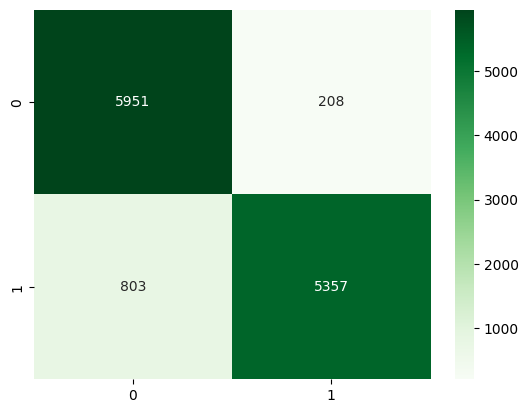

Test
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2054
           1       0.97      0.85      0.90      2053

    accuracy                           0.91      4107
   macro avg       0.92      0.91      0.91      4107
weighted avg       0.92      0.91      0.91      4107



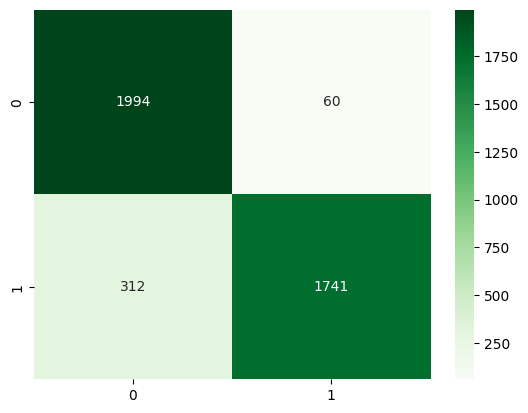

In [107]:
# modele selectionnee
from sklearn.metrics import confusion_matrix
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    print(dict(X.type.value_counts()))
    X = BoxCoxTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=3)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))
    cm_train = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
    plt.show()

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    cm_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.show()
    return clf

clf = KernelSVMRbf(7, data)

In [108]:
data[data.isFraud == 1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
8213,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
8214,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
8215,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1
8216,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1
8217,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
16422,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
16423,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
16424,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [112]:
import pickle

step = 1
type_ = "TRANSFER"
amount = 416001.33
oldbalanceOrg = 0.0
newbalanceOrig = 0.0
oldbalanceDest = 102.0
newbalanceDest = 9291619.62

def data_prediction(
        step : int,
        type_ : str,
        amount : float,
        oldbalanceOrg : float,
        newbalanceOrig : float,
        oldbalanceDest : float,
        newbalanceDest : float):
    prediction_data = [[step, type_, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]]
    # Créer un DataFrame à partir de prediction_data
    df_pred = pd.DataFrame(prediction_data, columns=['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

    # Concaténer à la fin de data (sans la colonne isFraud)
    X_new = pd.concat([data.drop(columns=['isFraud'], errors='ignore'), df_pred], ignore_index=True)
    X_new = LabelEncoder_(X_new)
    X_new = BoxCoxTransformation(X_new)
    Rs = RobustScaler()
    X_new = Rs.fit_transform(X_new)
    kpca = KernelPCA(n_components=7, kernel='rbf', random_state=0)
    X_new = kpca.fit_transform(X_new)
    X_new = X_new[-1]
    return X_new

def prediction(X, model_path):
    # charger le modele
    with open(model_path, "rb") as f:
        clf = pickle.load(f)
    return clf.predict([X])

## Cross validation

In [113]:
# cross validation
New_data = data.copy()
New_data = LabelEncoder_(New_data)
X,y = Target_feature(New_data)
X = BoxCoxTransformation(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y)
# Scalling
X_train, X_test = RobustScaler_(X_train, X_test)
kpca = KernelPCA(n_components=7, kernel='rbf', random_state=0)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf,X=X_train ,y=y_train,cv=10)
print('cross val accuracy',(accuracies))

/home/yann/.pyenv/versions/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yann/.pyenv/versions/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yann/.pyenv/versions/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yann/.pyenv/versions/machineLearning/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConve

cross val accuracy [0.93019481 0.9099026  0.92288961 0.91477273 0.92694805 0.90827922
 0.89772727 0.91883117 0.91152597 0.92038993]


***Cross Validation stable entre 89 et 93***

## Grid search

In [114]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 100)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto', 0.001, 0.01, 0.1, 1])
    coef0 = trial.suggest_float('coef0', 0.0, 1.0)
    degree = trial.suggest_int('degree', 2, 4)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovr', 'ovo'])
    break_ties = trial.suggest_categorical('break_ties', [True, False])

    model = SVC(
        kernel='poly',
        C=C,
        gamma=gamma,
        coef0=coef0,
        degree=degree,
        decision_function_shape=decision_function_shape,
        break_ties=break_ties,
        random_state=0
    )
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring='f1')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)
print("Best f1 score:", study.best_value)

[I 2025-06-02 06:12:09,638] A new study created in memory with name: no-name-2b814312-7377-4a63-9c1d-20c88242a6cb
/tmp/ipykernel_19654/906707292.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)
[I 2025-06-02 06:12:11,300] Trial 0 finished with value: 0.8814565026520046 and parameters: {'C': 6.7704519874706115, 'gamma': 1, 'coef0': 0.03822958008421573, 'degree': 4, 'decision_function_shape': 'ovr', 'break_ties': True}. Best is trial 0 with value: 0.8814565026520046.
/tmp/ipykernel_19654/906707292.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)
[I 2025-06-02 06:12:12,340] Tr

Best params: {'C': 34.16038230878199, 'gamma': 1, 'coef0': 0.8344054824231076, 'degree': 4, 'decision_function_shape': 'ovr', 'break_ties': False}
Best f1 score: 0.9267158463064961


Train
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6159
           1       0.95      0.89      0.92      6160

    accuracy                           0.93     12319
   macro avg       0.93      0.93      0.93     12319
weighted avg       0.93      0.93      0.93     12319



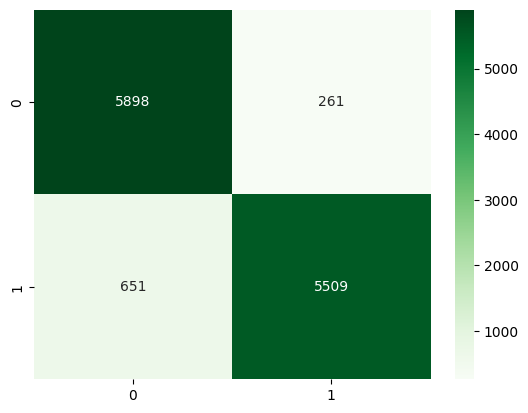

Test
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2054
           1       0.96      0.87      0.91      2053

    accuracy                           0.92      4107
   macro avg       0.92      0.92      0.92      4107
weighted avg       0.92      0.92      0.92      4107



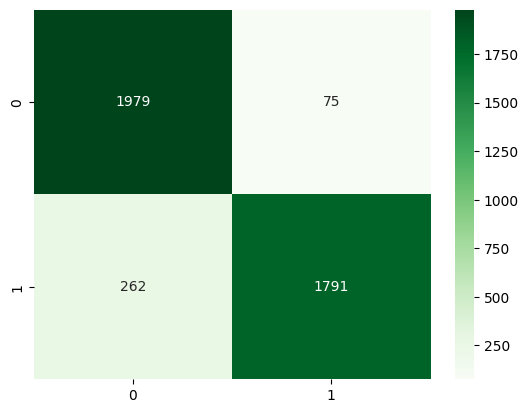

In [116]:
# modele selectionnee
from sklearn.metrics import confusion_matrix
def KernelSVMRbf(n, data):
    # Label encoding + RobustScaler
    New_data = data.copy()
    New_data = LabelEncoder_(New_data)
    X,y = Target_feature(New_data)
    X = BoxCoxTransformation(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y)
    # Scalling
    X_train, X_test = RobustScaler_(X_train, X_test)
    kpca = KernelPCA(n_components=n, kernel='rbf', random_state=0)
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    from sklearn.svm import SVC
    # Kernel SVM (kernel : rbf)
    clf = SVC(kernel='poly', random_state=0, degree=4, C=0.39680179876782457, gamma='scale', coef0= 0.8343697224650121, decision_function_shape='ovr', break_ties= True)
    clf.fit(X_train , y_train.values.ravel())

    # Prediction
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Metrique Train
    print("Train")
    print(classification_report(y_train, y_pred_train))
    cm_train = confusion_matrix(y_train, y_pred_train)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
    plt.show()

    # Metrique Test
    print("Test")
    print(classification_report(y_test, y_pred_test))
    cm_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.show()
    return clf

clf = KernelSVMRbf(7, data)

In [118]:
# Sauvegarde du modele
import pickle
with open("model/model.pkl", "wb") as f:
    pickle.dump(clf, f)